In [ ]:
import pandas as pd

# Load the datasets
ev_dataset = pd.read_csv('/content/drive/MyDrive/EV/ev_dataset.csv')
ev_india = pd.read_csv('/content/drive/MyDrive/EV/EVIndia.csv')

# Display the first few rows of each dataset
print(ev_dataset.head())
print(ev_india.head())

   Respondent ID  Age Gender Profession  Monthly Household Expenditure (INR)  \
0              1   35      M     Doctor                                56704   
1              2   23      F    Teacher                                81406   
2              3   28      M    Teacher                                21132   
3              4   31      M    Teacher                                34505   
4              5   58      M     Driver                                95596   

  Vehicle Type  Year of Purchase Purpose of Use Charging Location  \
0           4W              2019       Personal              Home   
1           4W              2017       Personal            Office   
2           4W              2018       Personal            Office   
3           2W              2016       Personal              Home   
4           2W              2016       Personal            Office   

   Distance to Charging Station (km)  Average Cost per Charge (INR)  \
0                                

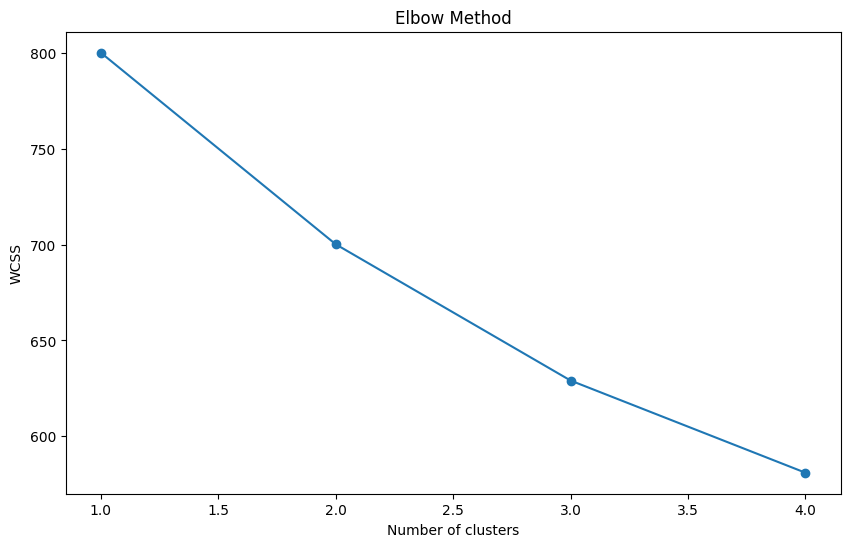

         Respondent ID        Age    Gender  \
Cluster                                       
0            54.000000  32.291667  0.833333   
1            51.961538  44.346154  0.230769   
2            46.538462  43.076923  0.038462   
3            49.708333  46.500000  1.000000   

         Monthly Household Expenditure (INR)  Year of Purchase  \
Cluster                                                          
0                               48959.041667       2018.041667   
1                               60734.730769       2018.961538   
2                               65193.384615       2017.807692   
3                               66756.458333       2019.041667   

         Distance to Charging Station (km)  Average Cost per Charge (INR)  \
Cluster                                                                     
0                                 4.250000                     137.750000   
1                                 6.307692                     161.384615   
2           

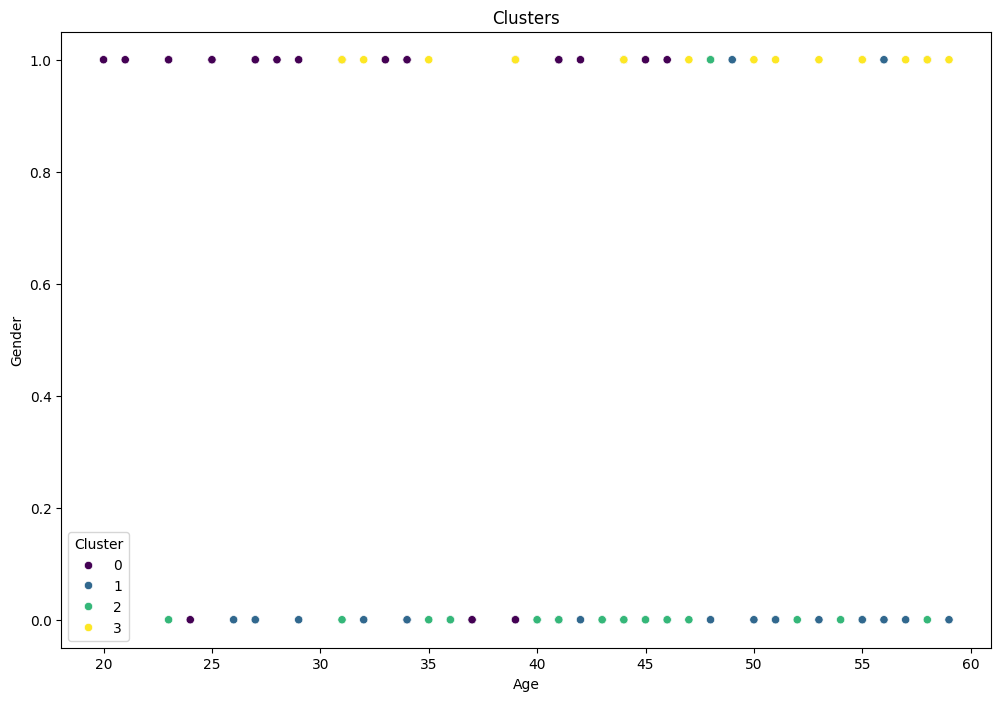

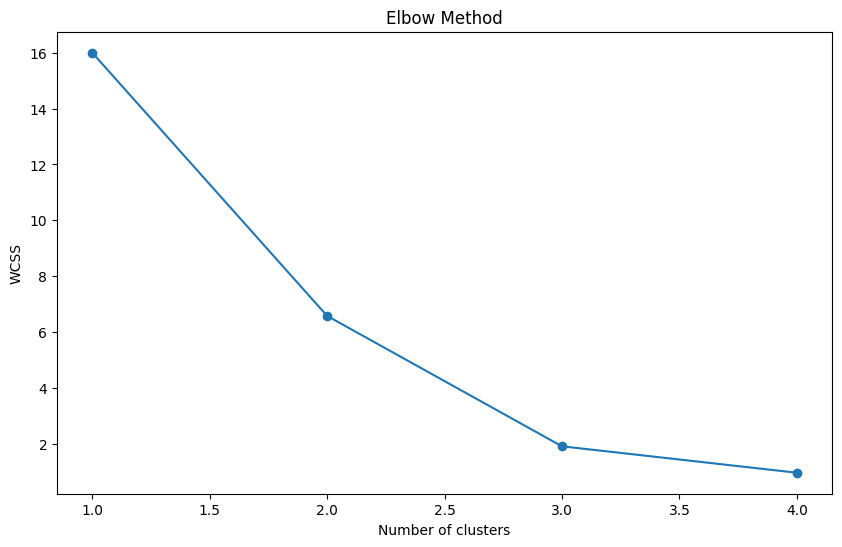

<ipython-input-19-17186c353ad4>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Cluster'] = clusters


              Range  Capacity  BootSpace  Cluster
Cluster                                          
0        309.000000       5.0      333.0      0.0
1        414.666667       5.0      401.0      1.0
2        470.000000       5.0      656.0      2.0
3        407.500000       5.0      620.0      3.0


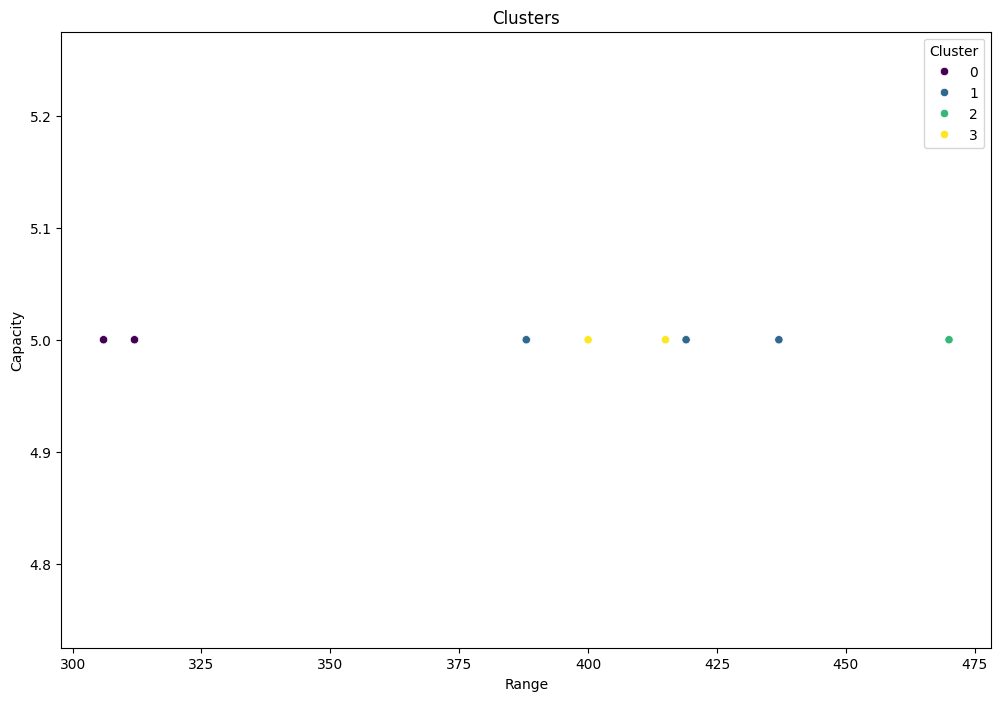

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert columns to numeric
def convert_columns_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

# Function to perform clustering analysis
def perform_clustering_analysis(data, features, max_clusters=4):
    # Convert selected features to numeric
    data = convert_columns_to_numeric(data, features)

    # Drop rows with NaN values in the selected features
    data = data.dropna(subset=features)

    # Extract the features from the dataset
    X = data[features]

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Determine the maximum number of clusters based on the number of samples
    n_samples = len(X)
    n_clusters = min(n_samples, max_clusters)

    # Elbow method to find the optimal number of clusters
    wcss = []
    for i in range(1, n_clusters + 1):  # Adjust the range to the number of samples
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_clusters + 1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Apply K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Add the cluster labels to the original dataset
    data.loc[:, 'Cluster'] = clusters

    # Filter only numeric columns for groupby mean calculation
    numeric_columns = data.select_dtypes(include='number').columns

    # Analyze the characteristics of each cluster
    cluster_summary = data.groupby('Cluster')[numeric_columns].mean()
    print(cluster_summary)

    # Visualize the clusters
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=features[0], y=features[1], hue='Cluster', data=data, palette='viridis')
    plt.title('Clusters')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

# Convert 'Gender' column to binary values
ev_dataset['Gender'] = ev_dataset['Gender'].map({'F': 0, 'M': 1})

# Remove non-numeric columns not needed for clustering
ev_dataset = ev_dataset.drop(columns=['Profession', 'Vehicle Type', 'Purpose of Use', 'Charging Location', 'Parking Location'])

# Features for clustering for ev_dataset
features_ev_dataset = [
    'Age',
    'Gender',
    'Monthly Household Expenditure (INR)',
    'Distance to Charging Station (km)',
    'Average Cost per Charge (INR)',
    'Frequency of Charging per Week',
    'Daily KM Travelled (Working Day)',
    'Daily KM Travelled (Non-working Day)'
]

# Perform clustering analysis on ev_dataset
perform_clustering_analysis(ev_dataset, features_ev_dataset)

# Remove the 'PriceRange' column from the ev_india dataset
ev_india = ev_india.drop(columns=['PriceRange'])

# Features for clustering for EVIndia dataset
features_ev_india = [
    'Range',
    'Capacity',
    'BootSpace'
]

# Convert Range and other necessary columns to numerical values for clustering
ev_india['Range'] = ev_india['Range'].str.extract('(\d+)').astype(float)
ev_india['Capacity'] = ev_india['Capacity'].str.extract('(\d+)').astype(float)
ev_india['BootSpace'] = ev_india['BootSpace'].str.extract('(\d+)').astype(float)

# Perform clustering analysis on EVIndia dataset
perform_clustering_analysis(ev_india, features_ev_india, max_clusters=4)
